In [ ]:
# Time Series fundamentals with TensorFlow
# We are going to predict price of BITCOIN based on the historical price of Bitcoin

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-08 20:45:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-02-08 20:45:09 (64.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd

df = pd.read_csv('prices.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

In [5]:
df.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
df.describe()

Closing Price (USD)  24h Open (USD)  24h High (USD)  24h Low (USD)
count          2787.000000     2787.000000     2787.000000    2787.000000
mean           6529.845141     6513.579485     6710.061683    6302.417386
std           10887.847444    10863.800772    11206.779756   10475.811252
min             108.584830      108.584830      118.675000      83.328330
25%             460.087500      459.400500      469.720995     450.818830
50%            2780.182500     2772.367500     2874.696250    2696.457500
75%            8506.923720     8496.887593     8763.291985    8221.060570
max           63346.789035    63562.673545    64801.787870   62094.632914

In [8]:
df.shape

(2787, 5)

In [9]:
df.tail()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2021-05-14      BTC         49764.132082    49596.778891    51448.798576   
2021-05-15      BTC         50032.693137    49717.354353    51578.312545   
2021-05-16      BTC         47885.625255    49926.035067    50690.802950   
2021-05-17      BTC         45604.615754    46805.537852    49670.414174   
2021-05-18      BTC         43144.471291    46439.336570    46622.853437   

            24h Low (USD)  
Date                       
2021-05-14   46294.720180  
2021-05-15   48944.346536  
2021-05-16   47005.102292  
2021-05-17   43868.638969  
2021-05-18   42102.346430

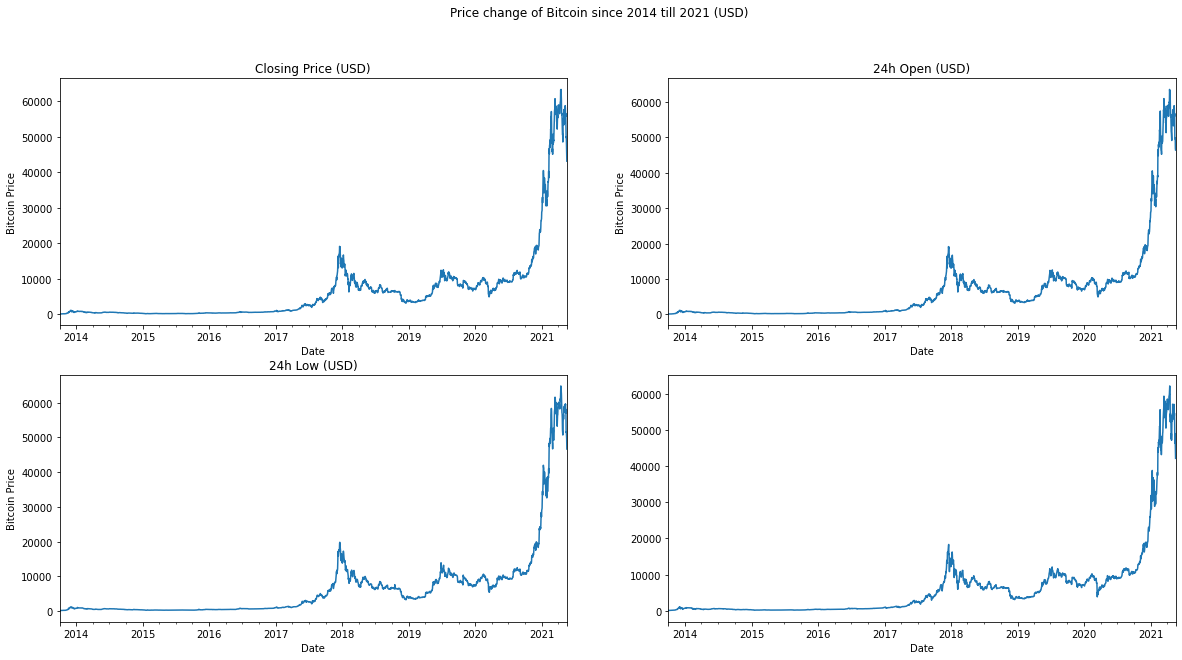

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

fig,axs = plt.subplots(2,2,figsize = (20,10))

df['Closing Price (USD)'].plot(ax = axs[0,0])
axs[0,0].set_title('Closing Price (USD)')
axs[0,0].set_ylabel('Bitcoin Price')

df['24h Open (USD)'].plot(ax = axs[0,1])
axs[0,1].set_title('24h Open (USD)')
axs[0,1].set_ylabel('Bitcoin Price')

df['24h High (USD)'].plot(ax = axs[1,0])
axs[1,0].set_title('24h High (USD)')
axs[1,0].set_ylabel('Bitcoin Price')

df['24h Low (USD)'].plot(ax = axs[1,1])
axs[1,0].set_title('24h Low (USD)')
axs[1,0].set_ylabel('Bitcoin Price')

plt.suptitle('Price change of Bitcoin since 2014 till 2021 (USD)')

plt.show();

In [11]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('prices.csv','r') as file:
  csv_reader = csv.reader(file,delimiter = ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%f'))
    btc_price.append(float(line[2]))

In [12]:
from sklearn.model_selection import train_test_split


split_size = int(0.8 * len(btc_price))

X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]

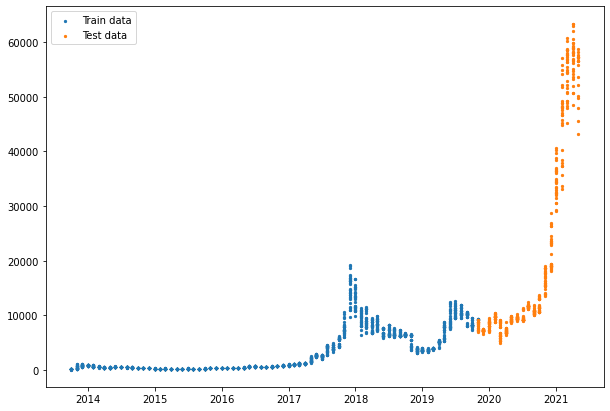

In [13]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train, s = 5, label = "Train data")
plt.scatter(X_test,y_test,s = 5, label = "Test data")

plt.legend()
plt.show();

In [14]:


# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)
     


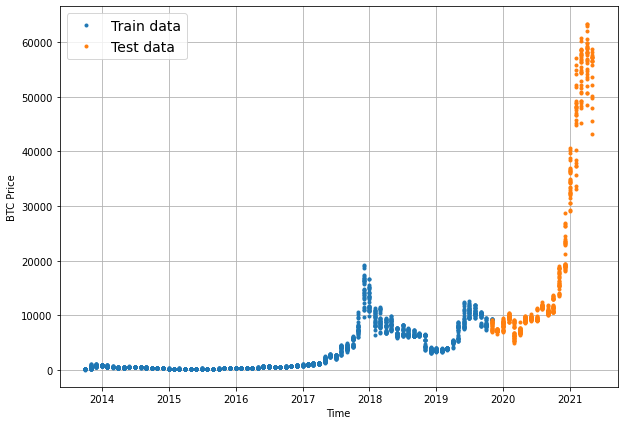

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Building baseline naive model

Models formula:

$$\hat{y}_{t} = y_{t-1}$$

In [16]:

# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 
     

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

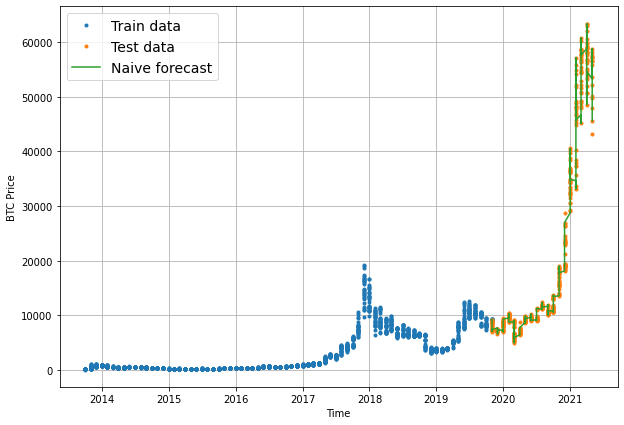

In [17]:


# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
     


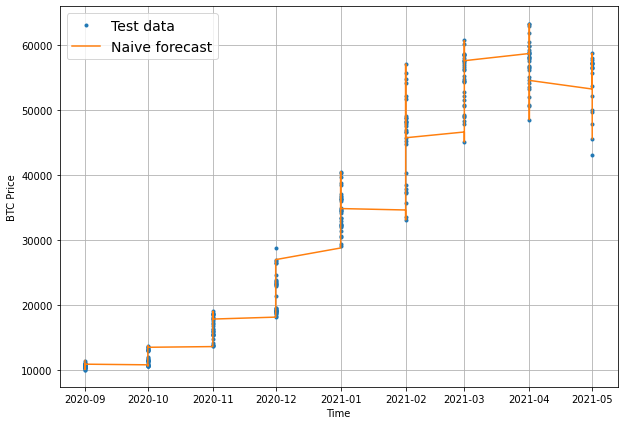

In [18]:


plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");
     


In [19]:
import tensorflow as tf
import numpy as np

In [20]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
     


def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     


In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [22]:


# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()
     


20056.635

In [23]:
HORIZON = 1
WINDOW_SIZE = 7

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
     



In [24]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [25]:
def make_windows(x,window_size = WINDOW_SIZE, horizon = HORIZON):

  """
  Turns 1D array into a 2D array of sequential labelled windows of window_size with hirizon size labels.
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  window_indx = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)),axis=0).T
  windowed_array = np.array(x)[window_indx]
  windows,labels = get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels



In [26]:
full_windows, full_labels = make_windows(btc_price)

len(full_windows), len(full_labels)

(2780, 2780)

In [27]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] - > Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] - > Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] - > Label: [125.96116]


In [28]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  """
  Splits matching pairs of windows and labels into train and test sets
  """  
  split_size = int(len(windows)*(1-test_split))
  
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [29]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [37]:
import os
import tensorflow as tf

def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 39ms/step - loss: 158.5

In [39]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [40]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')

In [41]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]